In [25]:
import os
import json
import numpy as np
import math
from skimage.measure import block_reduce
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def read_train_data():
    # Load the data dictionary with all the arrays
    with open(os.path.join(data_dir, data_filename)) as f:
        data_dict = json.load(f)

    # Load the text labels dictionary
    with open(os.path.join(data_dir, labels_filename)) as f:
        labels_dict = json.load(f)

    # Find the maximum size for any array and any text label
    # so that we can create fixed sized numpy arrays
    max_data_size = 0
    max_text_size = 0
    num_rows = 0
    for filename, val in data_dict.items():
        num_rows += 1

        data_size = len(data_dict[filename])
        if data_size > max_data_size:
            max_data_size = data_size

        text_size = len(labels_dict[filename])
        if text_size > max_text_size:
            max_text_size = text_size

    # We will reduce the size of our arrays
    # by using the block_reduce function
    # and averaging array values in intervals of FILTER_SIZE
    new_size = math.ceil(max_data_size / FILTER_SIZE)
    # Now we have our fixed size array for our down-sampled data
    data = np.zeros((num_rows, new_size))

    texts = []
    i = 0
    for filename, arr in data_dict.items():

        #turning all values positive before taking the mean (change by ankur)
        arr = np.absolute(arr)

        new_arr = block_reduce(np.array(arr), block_size=(FILTER_SIZE,), func=np.mean)
        new_arr_size = len(new_arr)
        # The array is probably smaller than the maximum allowed length
        # So let's set the boundary for that
        data[i, :new_arr_size] = new_arr

        text = labels_dict[filename]
        # We are padding text labels with empty strings if they are short
        texts.append(text.ljust(max_text_size).lower())
        i += 1

    text_data = np.array(texts)
    return data, text_data

In [26]:
from google.colab import drive

drive.mount('/content/gdrive')
%cd "gdrive/Shared drives/deep learning"
data_dir = "data"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
[Errno 2] No such file or directory: 'gdrive/Shared drives/deep learning'
/content/gdrive/Shared drives/deep learning


In [27]:
## ----- Don't run this cell ----- ##
## ----- READING RAW DATA ----- ##

'''SAMPLING_RATE = 5500
FILTER_SIZE = SAMPLING_RATE // 100

data_dir = "."
data_filename = os.path.join(data_dir, "data_sample_train.json")
labels_filename = os.path.join(data_dir, "labels_sample_train.json")
print(os.getcwd())
data, text_data = read_train_data()
data = data.reshape(np.append(data.shape, 1))

print("Data array shape: ", data.shape, "\nFirst 2 rows:")
print(data[:2], end='\n\n')

print("Text labels shape: ", text_data.shape, "\nFirst 2 rows:")
print(text_data[:2], end='\n\n')'''

'SAMPLING_RATE = 5500\nFILTER_SIZE = SAMPLING_RATE // 100\n\ndata_dir = "."\ndata_filename = os.path.join(data_dir, "data_sample_train.json")\nlabels_filename = os.path.join(data_dir, "labels_sample_train.json")\nprint(os.getcwd())\ndata, text_data = read_train_data()\ndata = data.reshape(np.append(data.shape, 1))\n\nprint("Data array shape: ", data.shape, "\nFirst 2 rows:")\nprint(data[:2], end=\'\n\n\')\n\nprint("Text labels shape: ", text_data.shape, "\nFirst 2 rows:")\nprint(text_data[:2], end=\'\n\n\')'

In [28]:
## ----- READING DOWNSAMPLED DATA ----- ##

data_filename = os.path.join(data_dir, "training_data_labels.json")
with open(data_filename) as f:
  data_dict = json.load(f)
  data = np.array(data_dict["training_data"])
  data = data.reshape(np.append(data.shape, 1))
  
  text_data = np.array(data_dict["training_labels"])

print("Data array shape: ", data.shape, "\nFirst 2 rows:")
print(data[:2], end='\n\n')

print("Text labels shape: ", text_data.shape, "\nFirst 2 rows:")
print(text_data[:2], end='\n\n')

if (data[1]==text_data[2]):
  print("hello")

Data array shape:  (12237, 6613, 1) 
First 2 rows:
[[[0.04407315]
  [0.04305174]
  [0.05130609]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.04407315]
  [0.04305174]
  [0.05130609]
  ...
  [0.        ]
  [0.        ]
  [0.        ]]]

Text labels shape:  (12237,) 
First 2 rows:
['the film won the naacp image award for outstanding'
 'the keystone bridge company, founded in 1865 by an']



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [29]:
if (np.array_equal(data[1],data[2])):
  print("hello")

In [30]:
'''## ----- REMOVING UNNECESSARY CHARACTERS ----- ##

alph = {}
for line in text_data:
  for char in line:
    if char not in alph:
      alph[char] = 1
    else:
      alph[char] += 1

print("Character frequencies:")
for char, count in sorted(alph.items(), key=lambda item: item[1], reverse=False):
  print("'{}': {},".format(char, count), end=' ')

print("\n")
alphabet = 'abcdefghijklmnopqrstuvwxyz0123456789,.?;:-_()=+@$!&/\'\" '

to_remove = ['?', '+', '$', ';', '/', '&', ':', '"', '\'']
for a in alphabet:
  if a not in alph.keys():
    print("Character '{}' not in the dataset".format(a))
    if a not in to_remove:
      to_remove.append(a)
print("\nTo remove:  {}".format(to_remove))
print("Number of characters to remove:  {}".format(len(to_remove)))

print("\nOld alphabet:  {}".format(alphabet))
alphabet = alphabet.translate({ord(i): None for i in ''.join(to_remove)})
print("New alphabet:  {}".format(alphabet))
'''

'## ----- REMOVING UNNECESSARY CHARACTERS ----- ##\n\nalph = {}\nfor line in text_data:\n  for char in line:\n    if char not in alph:\n      alph[char] = 1\n    else:\n      alph[char] += 1\n\nprint("Character frequencies:")\nfor char, count in sorted(alph.items(), key=lambda item: item[1], reverse=False):\n  print("\'{}\': {},".format(char, count), end=\' \')\n\nprint("\n")\nalphabet = \'abcdefghijklmnopqrstuvwxyz0123456789,.?;:-_()=+@$!&/\'" \'\n\nto_remove = [\'?\', \'+\', \'$\', \';\', \'/\', \'&\', \':\', \'"\', \'\'\']\nfor a in alphabet:\n  if a not in alph.keys():\n    print("Character \'{}\' not in the dataset".format(a))\n    if a not in to_remove:\n      to_remove.append(a)\nprint("\nTo remove:  {}".format(to_remove))\nprint("Number of characters to remove:  {}".format(len(to_remove)))\n\nprint("\nOld alphabet:  {}".format(alphabet))\nalphabet = alphabet.translate({ord(i): None for i in \'\'.join(to_remove)})\nprint("New alphabet:  {}".format(alphabet))\n'

In [31]:
#alphabet = 'abcdefghijklmnopqrstuvwxyz0123456789,.?;:-_()=+@$!&/\'\" ' 

In [32]:
import random

alphabet = 'abcdefghijklmnopqrstuvwxyz0123456789,.?;:-_()=+@$!&/\'\" '
# Define a mapping between characters and indices
char_to_int = dict((c, i) for i, c in enumerate(alphabet))
int_to_char = dict((i, c) for i, c in enumerate(alphabet))

max_text_length = 0
for d in text_data:
  l = len(d)
  if l > max_text_length:
    max_text_length = l

num_rows = len(text_data)
alphabet_size = len(alphabet)
labels = np.empty((num_rows, max_text_length, alphabet_size))

for i, d in enumerate(text_data):
  # Target text data -> integer encodings
  integer_encodings = [char_to_int[char] if char in char_to_int else random.randint(0, alphabet_size-1) for char in d]

  # -> one-hot encodings
  one_hot = tf.one_hot(indices=integer_encodings, depth=alphabet_size)
  labels[i] = one_hot.numpy()

In [33]:
i = 5
print(len(text_data[i]))
print(text_data[i], end="\n\n")

print(labels[i].shape)
print(labels[i])

50
it was later renamed rogers majestic corporation l

(50, 55)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [34]:
def create_model(time_window_size, max_text_length, alphabet_size):
        model = tf.keras.models.Sequential()

        model.add(layers.Conv1D(filters=16, kernel_size=3, padding='same', input_shape=(time_window_size, 1)))
        model.add(layers.LeakyReLU())
        model.add(layers.MaxPooling1D(pool_size=15, strides=13))

        model.add(layers.Conv1D(filters=32, kernel_size=3, padding='same'))
        model.add(layers.BatchNormalization(trainable=True))
        model.add(layers.LeakyReLU())
        model.add(layers.MaxPooling1D(pool_size=12, strides=10))

        # model.add(layers.LSTM(units=256))

        model.add(layers.Bidirectional(layers.LSTM(units=256, return_sequences=True, dropout=0.25), name='bi_lstm1'))
        model.add(layers.Bidirectional(layers.LSTM(units=256, return_sequences=True, dropout=0.25), name='bi_lstm2'))
        model.add(layers.Dense(units=alphabet_size, activation = "softmax"))
        #model.add(layers.Dense(units=alphabet_size, activation = "sigmoid", kernel_regularizer=keras.regularizers.l1_l2(l1=0.1, l2=0.01)))

        # loss_out = Lambda(ctc_lambda_func, output_shape=(1,), name='ctc')([x, labels, input_length, label_length])
        
        opt = keras.optimizers.Adam(learning_rate=0.0005)
        model.compile(optimizer=opt, loss=tf.keras.losses.CategoricalCrossentropy(), metrics=['accuracy'])
        # model.compile(optimizer="sgd", loss="mse", metrics=[metric])

        print(model.summary())
        return model 

In [35]:
alphabet_size = len(alphabet)  # Ankur said it's 55. We can change the value later
sample_len = 6613
#print(alphabet_size)
model = create_model(time_window_size=sample_len, max_text_length=max_text_length, alphabet_size=alphabet_size)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 6613, 16)          64        
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 6613, 16)          0         
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 508, 16)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 508, 32)           1568      
_________________________________________________________________
batch_normalization_1 (Batch (None, 508, 32)           128       
_________________________________________________________________
leaky_re_lu_3 (LeakyReLU)    (None, 508, 32)           0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 50, 32)           

In [36]:
print(data.shape)
print(np.asarray(labels).shape)

(12237, 6613, 1)
(12237, 50, 55)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
# train_data, test_data, train_lbl, test_lbl = train_test_split(data, labels, test_size=0.2, random_state=42)
random_state = 42
rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=random_state)
for train, test in rkf.split(data):
    print("%s %s" % (train, test))

X_train, X_test, y_train, y_test = data[train], data[test], labels[train], labels[test]

[    1     2     4 ... 12233 12234 12236] [    0     3     8 ... 12228 12230 12235]
[    0     1     2 ... 12233 12234 12235] [   10    12    20 ... 12225 12232 12236]
[    0     1     2 ... 12234 12235 12236] [   15    26    27 ... 12216 12226 12229]
[    0     1     3 ... 12234 12235 12236] [    2     6     7 ... 12214 12227 12233]
[    0     2     3 ... 12233 12235 12236] [    1     4     5 ... 12223 12231 12234]
[    0     1     3 ... 12232 12233 12234] [    2    10    21 ... 12229 12235 12236]
[    0     2     3 ... 12234 12235 12236] [    1     7    17 ... 12230 12231 12233]
[    0     1     2 ... 12234 12235 12236] [    3     6    13 ... 12222 12224 12232]
[    1     2     3 ... 12234 12235 12236] [    0     4     9 ... 12186 12191 12207]
[    0     1     2 ... 12233 12235 12236] [    5     8    11 ... 12227 12228 12234]
[    0     2     3 ... 12234 12235 12236] [    1     4     5 ... 12228 12230 12233]
[    0     1     2 ... 12234 12235 12236] [   20    22    34 ... 12222 12223

In [38]:
print("Training set\n", X_train.shape)
print(y_train.shape, end="\n\n")

print("Test set\n", X_test.shape)
print(y_test.shape)

Training set
 (9790, 6613, 1)
(9790, 50, 55)

Test set
 (2447, 6613, 1)
(2447, 50, 55)


In [39]:
epochs = 100
early_stopping_patience = 10
early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=early_stopping_patience, restore_best_weights=True
)

history = model.fit(
    X_train,
    y_train,
    epochs=epochs,
    batch_size=16,
    validation_split=0.25,
    callbacks=[early_stopping]
)

Epoch 1/100
459/459 [==============================] - 11s 25ms/step - loss: 3.0064 - accuracy: 0.1812 - val_loss: 2.9793 - val_accuracy: 0.1837
Epoch 2/100
459/459 [==============================] - 10s 22ms/step - loss: 2.9372 - accuracy: 0.1903 - val_loss: 2.8837 - val_accuracy: 0.1983
Epoch 3/100
459/459 [==============================] - 10s 22ms/step - loss: 2.8505 - accuracy: 0.2023 - val_loss: 2.8004 - val_accuracy: 0.2101
Epoch 4/100
459/459 [==============================] - 10s 22ms/step - loss: 2.7835 - accuracy: 0.2117 - val_loss: 2.7582 - val_accuracy: 0.2174
Epoch 5/100
459/459 [==============================] - 10s 22ms/step - loss: 2.7261 - accuracy: 0.2207 - val_loss: 2.6912 - val_accuracy: 0.2274
Epoch 6/100
459/459 [==============================] - 10s 22ms/step - loss: 2.6797 - accuracy: 0.2290 - val_loss: 2.6543 - val_accuracy: 0.2362
Epoch 7/100
459/459 [==============================] - 10s 22ms/step - loss: 2.6350 - accuracy: 0.2373 - val_loss: 2.5884 - val_ac

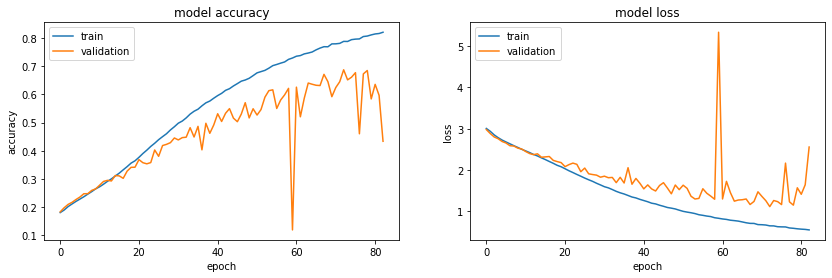

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 4))

#  "Accuracy"
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

# "Loss"
plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

plt.show()

In [41]:
model.evaluate(X_test, y_test)     

77/77 [==============================] - 1s 10ms/step - loss: 1.1785 - accuracy: 0.6760


[1.1785300970077515, 0.6759623885154724]

In [42]:
# A utility function to decode the output of the network
def reconstruct_sentences(onehots):
  reconstructions = []
  for sentence in onehots:
    r = ""
    for i in sentence:
      r += str(int_to_char.get(np.argmax(i)))
    reconstructions.append(r)
  return reconstructions


def count_num_errors(pred_texts, orig_texts):
  err_w = 0
  err_c = 0
  total_words = 0
  total_chars = 0
  for i in range(len(pred_texts)):
    pred_text = pred_texts[i]
    orig_text = orig_texts[i]

    pred_tokens = pred_text.split()
    orig_tokens = orig_text.split()

    pred_w_len = len(pred_tokens)
    orig_w_len = len(orig_tokens)
    total_words += max(pred_w_len, orig_w_len)
    # err_w = 0
    for w in range(min(pred_w_len, orig_w_len)):
      if pred_tokens[w] != orig_tokens[w]:
        err_w += 1
    
    pred_c_len = len(pred_text)
    orig_c_len = len(orig_text)
    total_chars += max(pred_c_len, orig_c_len)

    for c in range(min(pred_c_len, orig_c_len)):
      if pred_text[c] != orig_text[c]:
        err_c += 1
  return err_w, total_words, err_c, total_chars


# For random sampling from each batch
import random, math

test_size = len(X_test)
batch_size = 16
num_batches = math.ceil(test_size / batch_size)
samples_per_batch = 1
sample_ind = 1
sample_text = ""
err_w, total_words, err_c, total_chars = 0, 0, 0, 0

for b in range(num_batches):
  start_ind = b * batch_size
  end_ind = min(start_ind + batch_size, test_size)

  batch_X = X_test[start_ind : end_ind]
  batch_y = y_test[start_ind : end_ind]
  
  preds = model.predict(batch_X)
  pred_texts = reconstruct_sentences(preds)
  orig_texts = reconstruct_sentences(batch_y)

  m1, m2, m3, m4 = count_num_errors(pred_texts, orig_texts)
  err_w += m1
  total_words += m2
  err_c += m3
  total_chars += m4

  if random.random() < 0.2:
    sample_indices = random.sample(range(batch_size), samples_per_batch)
    for i in sample_indices:
      sample_text += "Sample #{}\n".format(sample_ind)
      sample_text += "Ground truth:  \t{}\n".format(orig_texts[i])
      sample_text += "Reconstruction:\t{}\n\n".format(pred_texts[i])
      sample_ind += 1

word_error = err_w / total_words if total_words != 0 else 0
char_error = err_c / total_chars if total_chars != 0 else 0
accuracy_text = "Accurate words: \t{}/{}\n".format(total_words - err_w, total_words)
accuracy_text += "Word level accuracy: \t{}\n\n".format(1 - word_error)
accuracy_text += "Accurate chars: \t{}/{}\n".format(total_chars - err_c, total_chars)
accuracy_text += "Char level accuracy: \t{}\n".format(1 - char_error)

print(accuracy_text)
print(sample_text)

Accurate words: 	9037/21538
Word level accuracy: 	0.41958399108552324

Accurate chars: 	82704/122350
Char level accuracy: 	0.6759624029423784

Sample #1
Ground truth:  	in all cases, humeral spines are present in males 
Reconstruction:	in all casee, aameraa  piies arr renennt in males 

Sample #2
Ground truth:  	the insertion of the latissimus dorsi is found alo
Reconstruction:	the deeeabby of the galtaaar  iisstt  sfigany port

Sample #3
Ground truth:  	richard t. crotty (born august 30, 1948 in dobbs f
Reconstruction:	richard t. crotty (born august 30, 1948 in dobbs f

Sample #4
Ground truth:  	as of april 2017, burton is serving as chair of th
Reconstruction:	as ou eepbcn 10178, innernn hesuedd the fiuer ff i

Sample #5
Ground truth:  	minoan art is the art produced by the minoan civil
Reconstruction:	kinmnr aas is thettt  llotcce  bn the siton tuuiil

Sample #6
Ground truth:  	the hong kong royal instructions 1917 was one of t
Reconstruction:	the hong kong royaa instrrctions 1117 w

In [43]:
'''reconstructions = []
for p in prediction:
  r = ""
  for i in p:
    r += str(int_to_char.get(np.argmax(i)))
  reconstructions.append(r)

for i in range(10):
  print("Ground truth:\t{}".format(text_data[i]))
  print("Reconstruction:\t{}\n".format(reconstructions[i]))'''

'reconstructions = []\nfor p in prediction:\n  r = ""\n  for i in p:\n    r += str(int_to_char.get(np.argmax(i)))\n  reconstructions.append(r)\n\nfor i in range(10):\n  print("Ground truth:\t{}".format(text_data[i]))\n  print("Reconstruction:\t{}\n".format(reconstructions[i]))'

In [44]:
checkpoint_path = "checkpoints/1D"
model_name = "{}_epochs_{:.3f}_accuracy".format(epochs, (1 - char_error))
model_save_path = os.path.join(checkpoint_path, model_name)
model.save_weights(model_save_path)